In [1]:
import sys
sys.path.append('/home/hsher/projects/Metadensity')
from metadensity.metadensity import *
from metadensity.plotd import *
import pandas as pd
import matplotlib.pyplot as plt


# Load encode metadata
I have precompiled list of uID and the .bam, .bigWig files in the following dataframe.

In [2]:
# load IDs
encode_data = pd.read_pickle('~/projects/eclip_encode_id.pickle')
eclip_bam = pd.read_csv('/home/hsher/projects/RBP_annot/ENCODE_FINAL_ANNOTATIONS.uidsonly.txt.manifesthg38.txt', sep = '\t', header= 0)

# join data
encode_data = pd.merge(eclip_bam[['uID', 'RBP', 'Cell line']], encode_data, left_on = ['RBP', 'Cell line'], right_on = ['RBP', 'cell_line'])

`minus_0` is the bigWig file for `minus` strand for replicate `0`. The files are in `/home/hsher/seqdata/eclip_raw`. You don't need to specify all of them. The eCLIP object will take care of them.

# load RBPs into eCLIP object

I build an eCLIP object that will connect all .bam, .bigWig and .bed (for IDR peaks, individual peaks) together. All you need to do is point a row of the previous dataframe, and use `RBP_centric_approach()` to compute the regions for metagene, and find positive (transcripts with IDR) and negative (transcript w/o any peaks) examples. Building the object will take a while (~1 min) since a lot of I/O.

In [3]:
HNRNPC = eCLIP()
HNRNPC.RBP_centric_approach(encode_data.loc[(encode_data['RBP'] == 'HNRNPC')&(encode_data['Cell line'] == 'HepG2')])

adding peaks
finding negative/positive examples
Building metagene and metadensity


In [4]:
RPS3 = eCLIP()
RPS3.RBP_centric_approach(encode_data.loc[(encode_data['RBP'] == 'RPS3')&(encode_data['Cell line'] == 'HepG2')])

adding peaks
finding negative/positive examples
Building metagene and metadensity


In [5]:
RBFOX2 = eCLIP()
RBFOX2.RBP_centric_approach(encode_data.loc[(encode_data['RBP'] == 'RBFOX2')&(encode_data['Cell line'] == 'HepG2')])

adding peaks
finding negative/positive examples
Building metagene and metadensity


In [6]:
LIN28B = eCLIP()
LIN28B.RBP_centric_approach(encode_data.loc[(encode_data['RBP'] == 'LIN28B')&(encode_data['Cell line'] == 'HepG2')])

adding peaks
finding negative/positive examples
Building metagene and metadensity


In [7]:
_ = [e.get_density_array() for e in [HNRNPC, RPS3, RBFOX2, LIN28B]]

## (Optional) Let's take a look what's inside eCLIP objects

In [8]:
print(HNRNPC.name, 'is my name;', HNRNPC.uID, 'is my uID.')

HNRNPC is my name; 203 is my uID.


In [9]:
HNRNPC.rep1 # this the the `ReadDensity` object containing the + and - strand of the replicate 1. Same work for .`rep2`

In [10]:
HNRNPC.ctrl # we have control too

In [11]:
HNRNPC.rep1.values('chr1', 100, 120, '+') # to extract some regions

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [12]:
HNRNPC.idr # points to the IDR peaks

<BedTool(/home/hsher/seqdata/eclip_bed/sorted/203.01v02.IDR.out.0102merged.bed.blacklist_removed.bed.narrowPeak.bed)>

In [13]:
HNRNPC.peak1 # peak for rep 1

<BedTool(/home/elvannostrand/data/clip/CLIPseq_analysis/ENCODE_FINALforpapers_20180205/hg38/203_01.basedon_203_01.peaks.l2inputnormnew.bed.compressed.bed.blacklist_removed.bed)>

In [14]:
HNRNPC.idr_transcript # transcripts regions with IDR peaks (those as positive example)

<BedTool(/scratch/hsher/21926864.tscc-mgr7.local/pybedtools.njiuzamb.tmp)>

In [15]:
HNRNPC.no_peak # transcripts w/o any peak

<BedTool(/scratch/hsher/21926864.tscc-mgr7.local/pybedtools.kqjzsv1z.tmp)>

In [16]:
HNRNPC.idr_metagene.keys() # `.idr_metagene` is an dictionary, key = transcript id; value = `Metagene object`

dict_keys(['ENST00000655486.1', 'ENST00000435064.5', 'ENST00000400809.8', 'ENST00000344843.12', 'ENST00000673477.1', 'ENST00000617444.5', 'ENST00000610897.4', 'ENST00000378536.5', 'ENST00000378156.9', 'ENST00000377705.6', 'ENST00000377577.10', 'ENST00000377482.10', 'ENST00000400908.7', 'ENST00000635687.1', 'ENST00000361311.4', 'ENST00000240185.7', 'ENST00000614757.4', 'ENST00000376810.5', 'ENST00000376030.7', 'ENST00000480945.6', 'ENST00000412962.4', 'ENST00000375436.9', 'ENST00000361221.8', 'ENST00000264202.8', 'ENST00000312239.10', 'ENST00000264211.12', 'ENST00000308271.14', 'ENST00000374695.8', 'ENST00000302271.11', 'ENST00000324856.13', 'ENST00000618852.5', 'ENST00000247087.10', 'ENST00000398958.6', 'ENST00000413987.1', 'ENST00000542507.5', 'ENST00000642260.1', 'ENST00000257075.9', 'ENST00000373477.8', 'ENST00000373475.10', 'ENST00000257118.5', 'ENST00000650449.1', 'ENST00000314607.11', 'ENST00000354618.10', 'ENST00000567887.5', 'ENST00000447388.7', 'ENST00000372597.5', 'ENST000003

In [17]:
example_metagene = HNRNPC.idr_metagene['ENST00000655486.1'] # take a look what is in metagene

In [18]:
print(example_metagene.chrom, example_metagene.start, example_metagene.stop, example_metagene.strand)

chr1 1221736 1221785 -


In [19]:
print(example_metagene.five_utr, example_metagene.exon)

set() {(1223831, 1223968), (1218457, 1218633), (1218768, 1218927), (1223243, 1223357)}


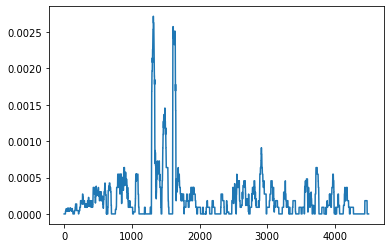

In [20]:
# access to individual metagene's density over here 203 is uID, replicate 1, introns
plt.plot(example_metagene.densities['203']['rep1']['intron'][0]) # align to left

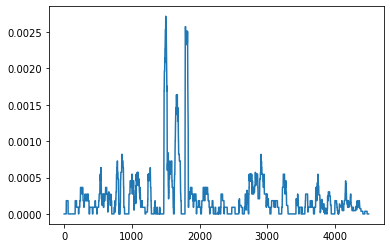

In [21]:
# access to individual metagene's density over here 203 is uID, replicate 1, introns
plt.plot(example_metagene.densities['203']['rep1']['intron'][1]) # align to right

In [22]:
# similarly we have HNRNPC.neg_metagene for negative examples
type(HNRNPC.neg_metagene)

dict

# Visualize metadensity individually

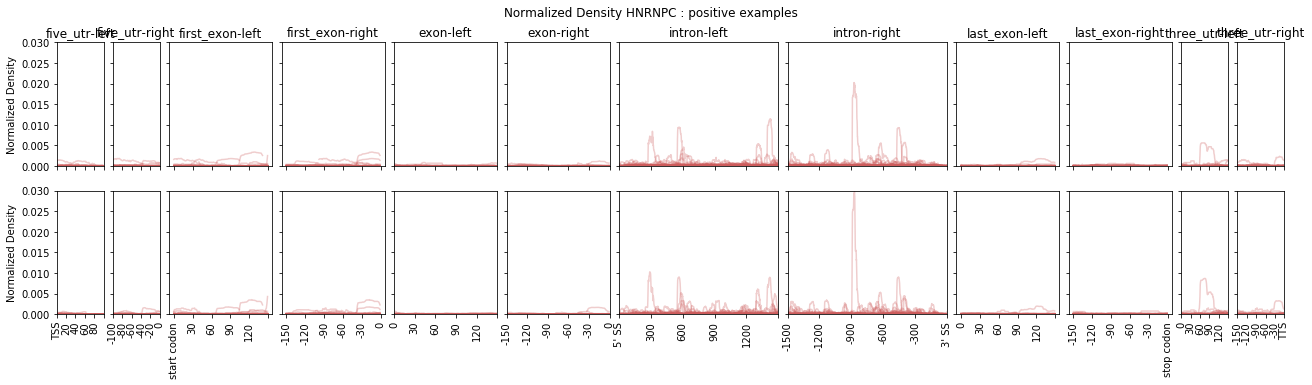

In [23]:
plot_density(HNRNPC, alpha = 0.3)

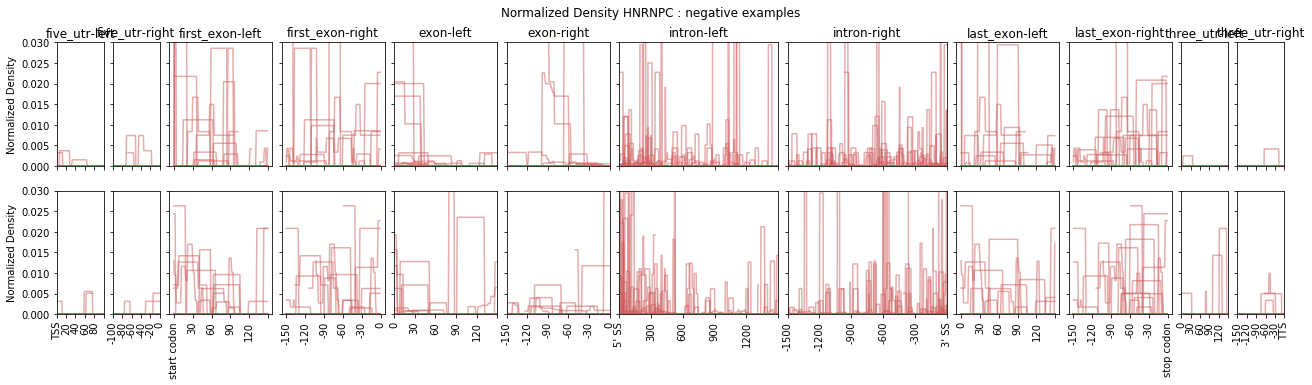

In [24]:
plot_density(HNRNPC, example = 'negative')

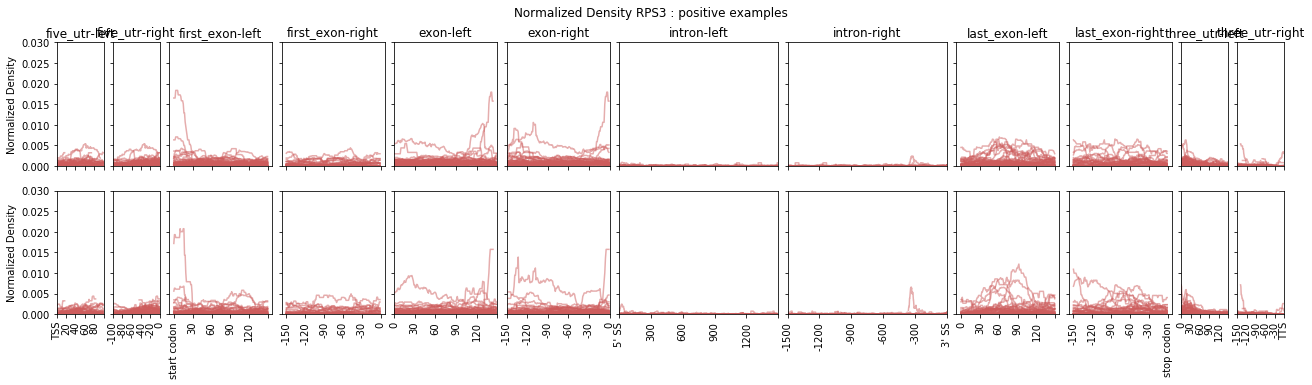

In [25]:
plot_density(RPS3)

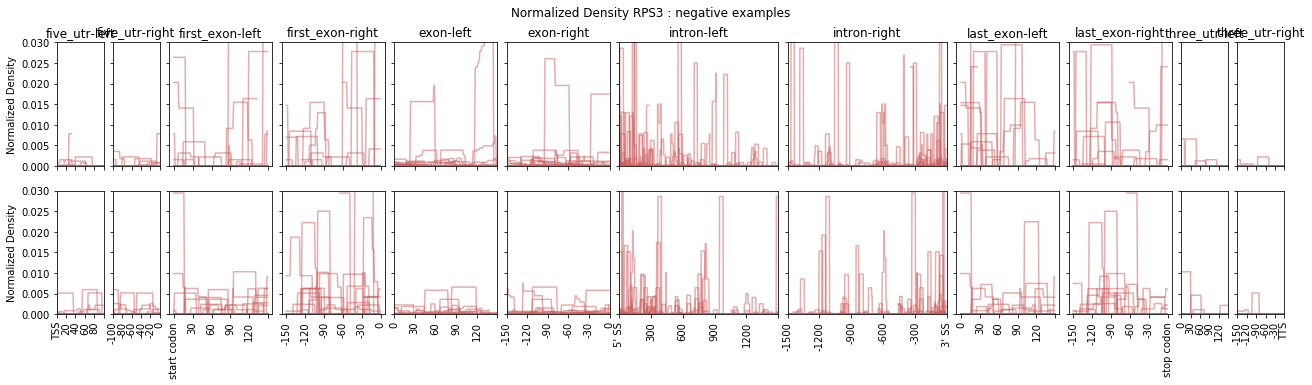

In [26]:
plot_density(RPS3, example = 'negative')

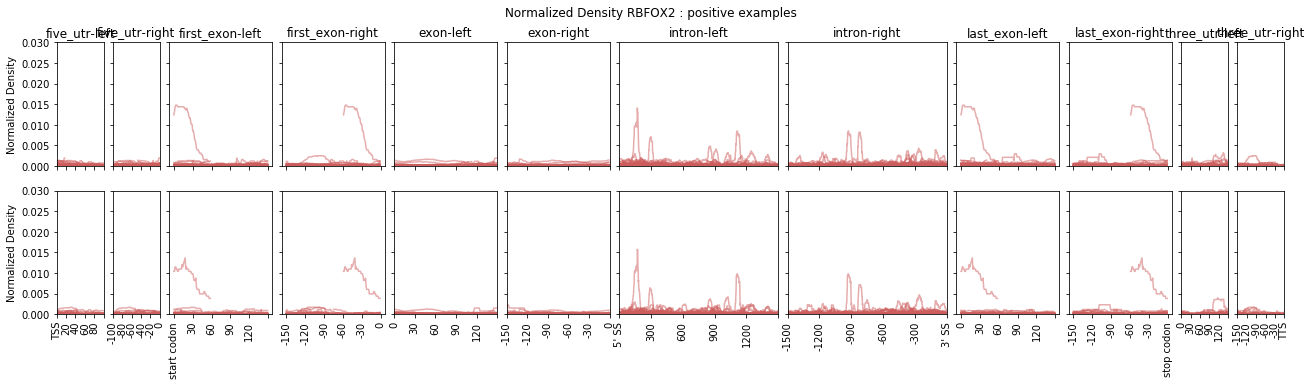

In [27]:
plot_density(RBFOX2)

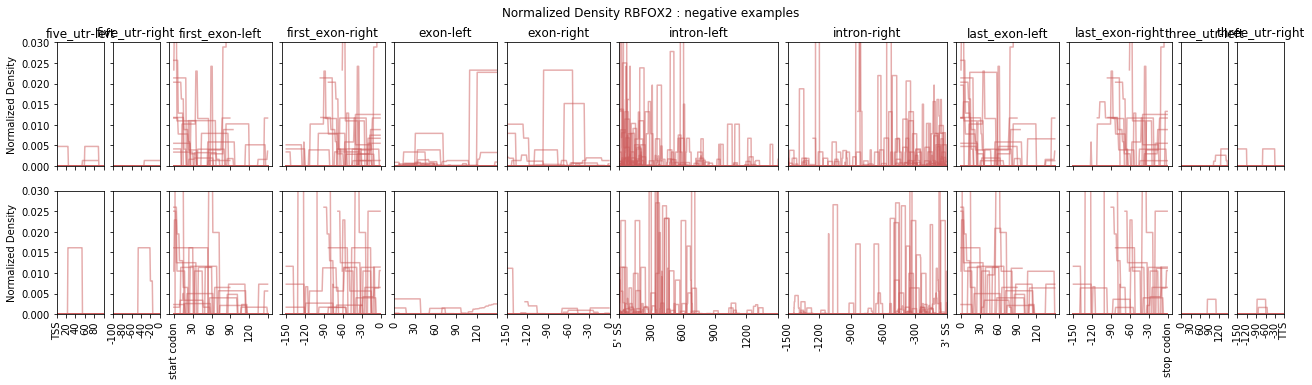

In [28]:
plot_density(RBFOX2, example = 'negative')

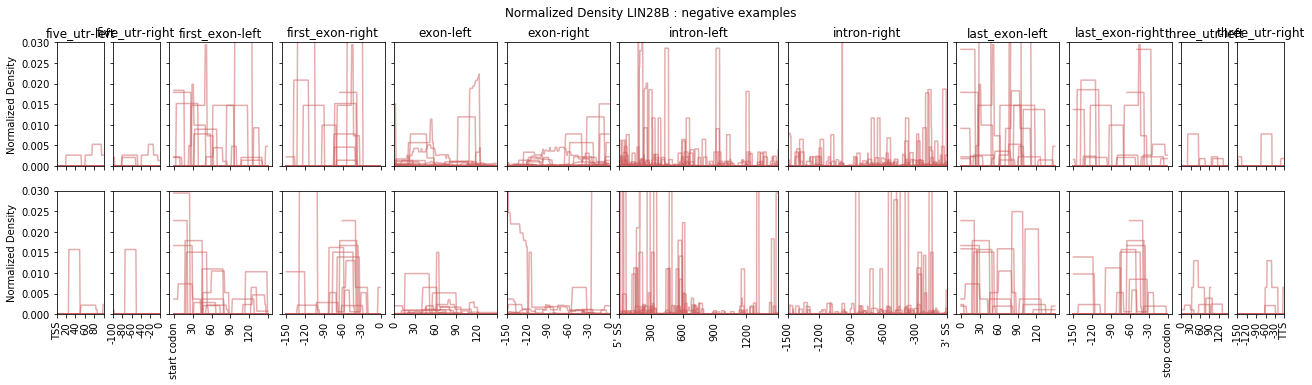

In [29]:
plot_density(LIN28B, example = 'negative')

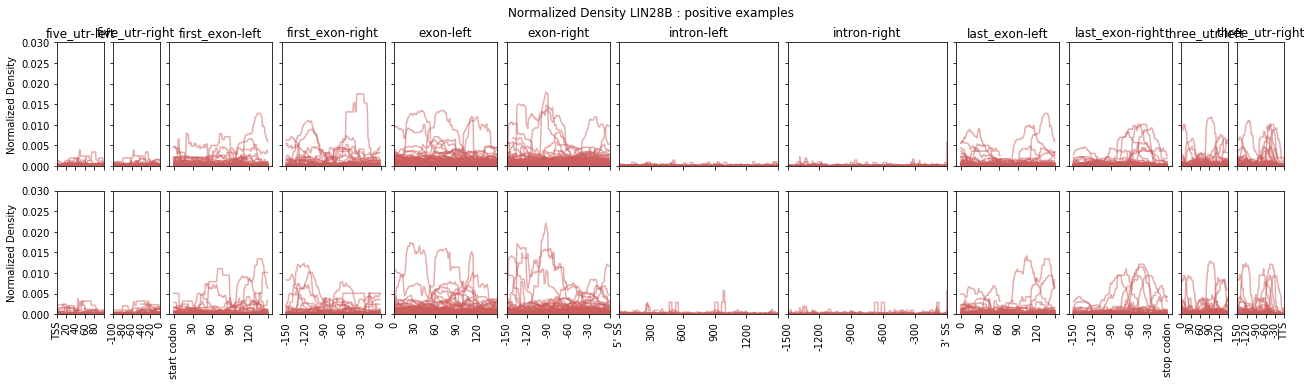

In [30]:
plot_density(LIN28B)

# Every metagene has a different length of intron/exon/utrs.

`eCLIP.get_density_array()` helps you align them (by padding to right/left`

In [31]:
# access positive example, in 5'UTR, align to the right, replicate 1; the length of 5'UTR is set to 500; with total 114 examples
# 500 b.p. downstream to the start of 5'UTR
HNRNPC.density_array['positive', 'five_utr', 'left', 'rep1'].shape

(114, 100)

In [32]:
# 500 b.p. upstream to the end of 5'UTR in negative examples
HNRNPC.density_array['negative', 'five_utr', 'right', 'rep1'].shape

(200, 100)

# Calculate probability distribution

`pos_spec_bind_strength(eCLIP)` does that

In [33]:
HNRNPC_prob = pos_spec_bind_strength(HNRNPC)
RPS3_prob = pos_spec_bind_strength(RPS3)
RBFOX2_prob = pos_spec_bind_strength(RBFOX2)
LIN28B_prob = pos_spec_bind_strength(LIN28B)

In [34]:
# into 20 bins, 500 b.p. downstream to the start of 5'UTR
HNRNPC_prob['positive', 'five_utr', 'left', 'rep1'].shape

(20, 100)

# Do two reps look the same (density probability distribution)

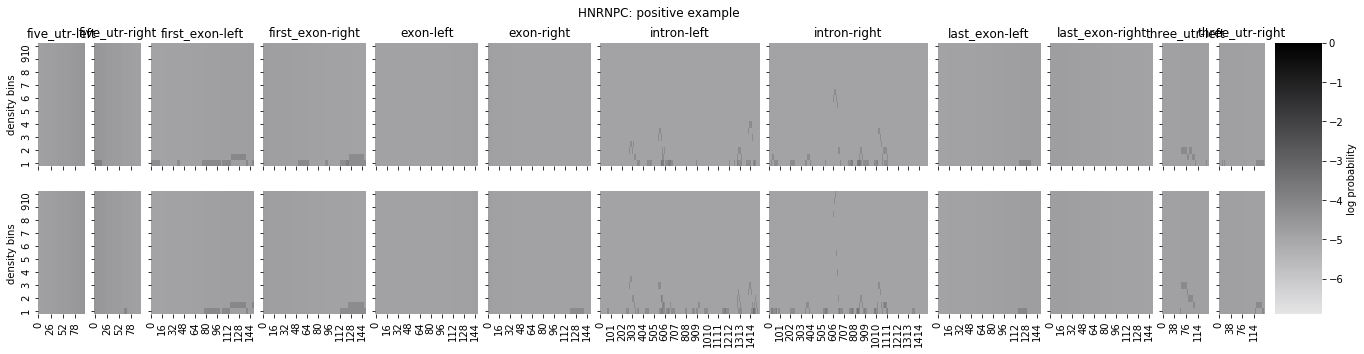

In [35]:
plot_prob(HNRNPC,HNRNPC_prob, 'positive')

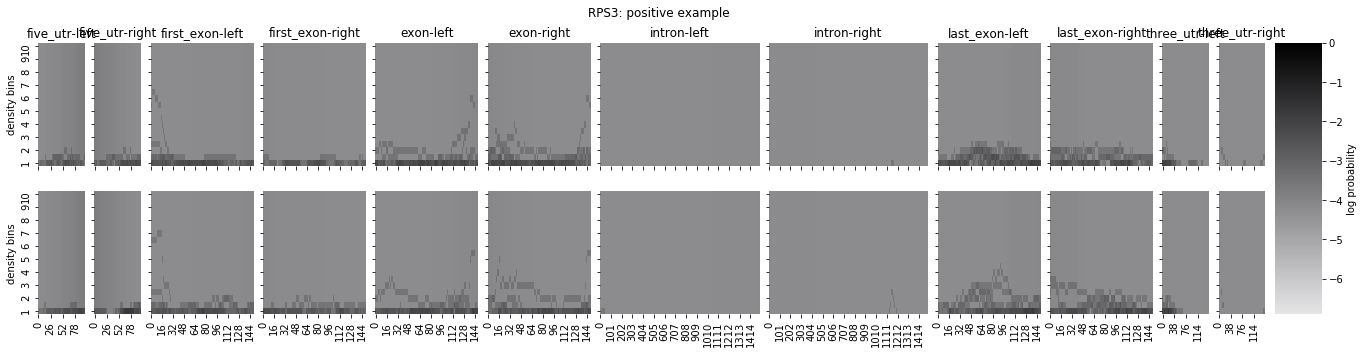

In [36]:
plot_prob(RPS3,RPS3_prob, 'positive')

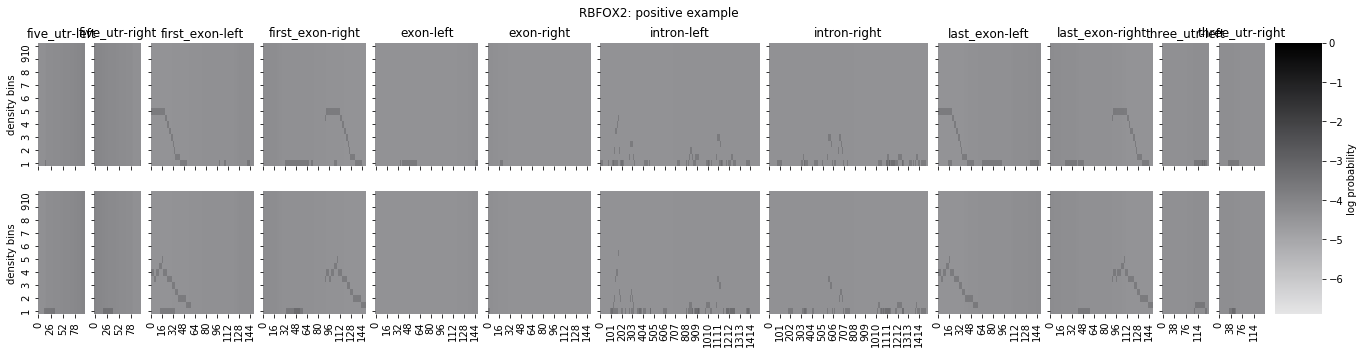

In [37]:
plot_prob(RBFOX2, RBFOX2_prob, 'positive')

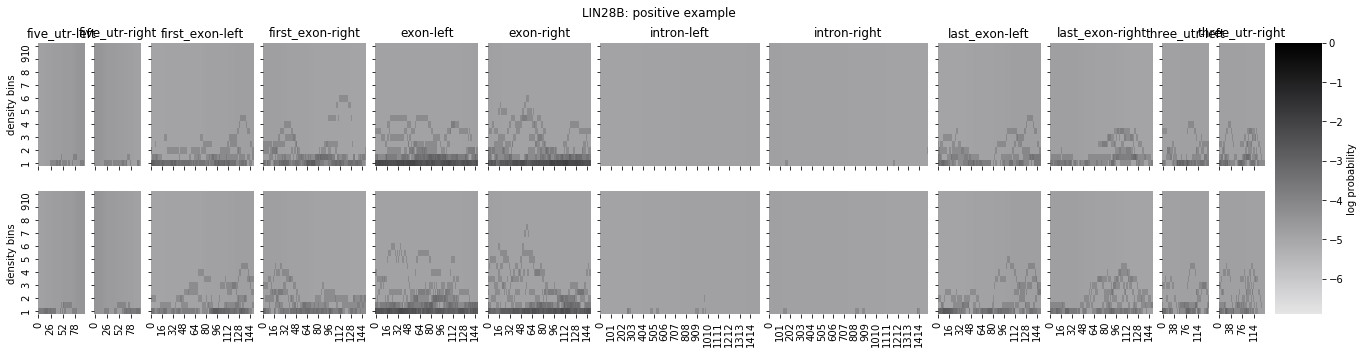

In [38]:
plot_prob(LIN28B, LIN28B_prob, 'positive')

# Consistency between discretized probability distribution

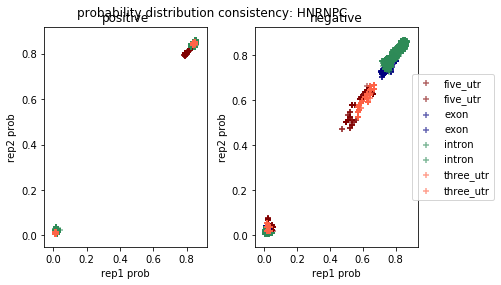

In [39]:
prob_consistency(HNRNPC_prob, 'HNRNPC')

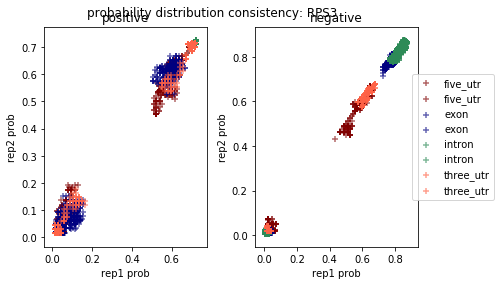

In [40]:
prob_consistency(RPS3_prob, 'RPS3')

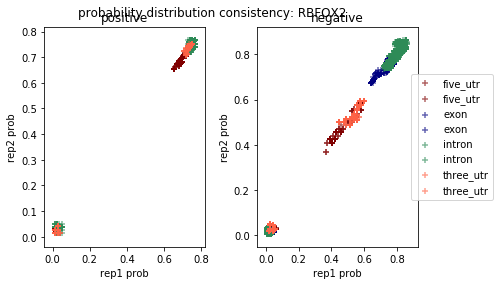

In [41]:
prob_consistency(RBFOX2_prob, 'RBFOX2')

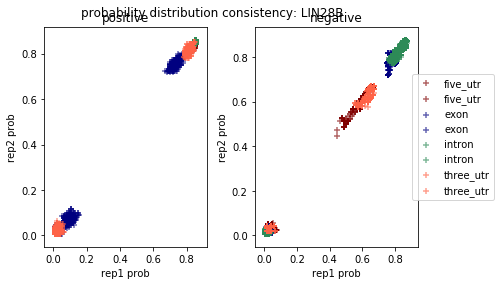

In [42]:
prob_consistency(LIN28B_prob, 'LIN28B')

# Get mean, std and median of density

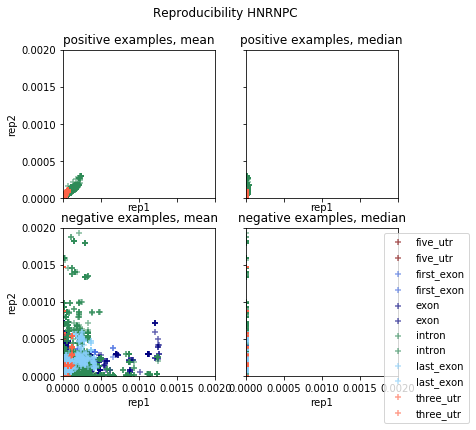

In [43]:
mean_med_consistency(HNRNPC)

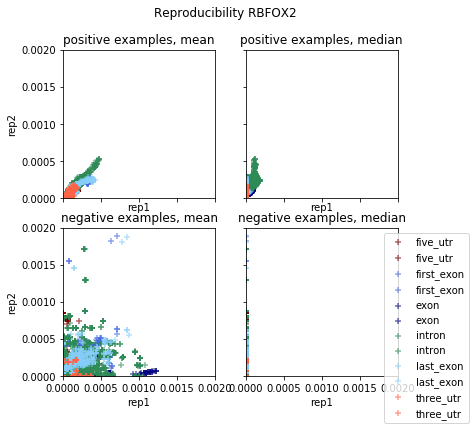

In [44]:
mean_med_consistency(RBFOX2)

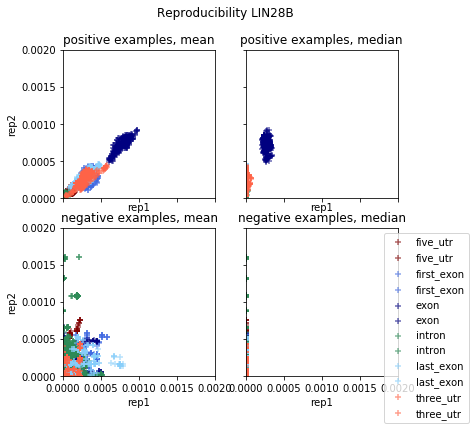

In [45]:
mean_med_consistency(LIN28B)

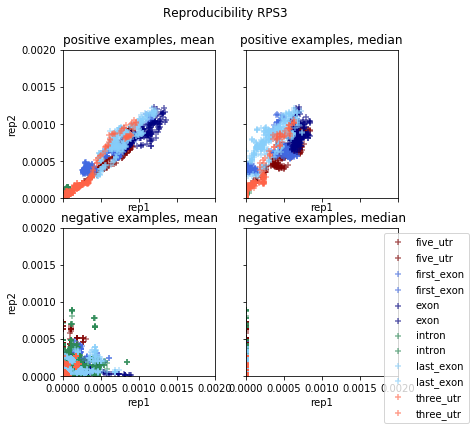

In [46]:
mean_med_consistency(RPS3)

# Median and Mean density

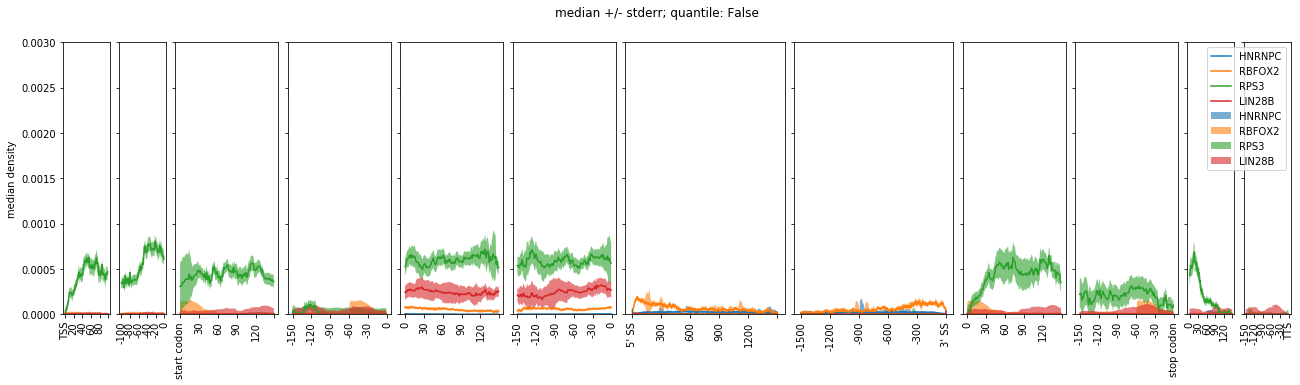

In [47]:
plot_median_density([HNRNPC, RBFOX2, RPS3, LIN28B])

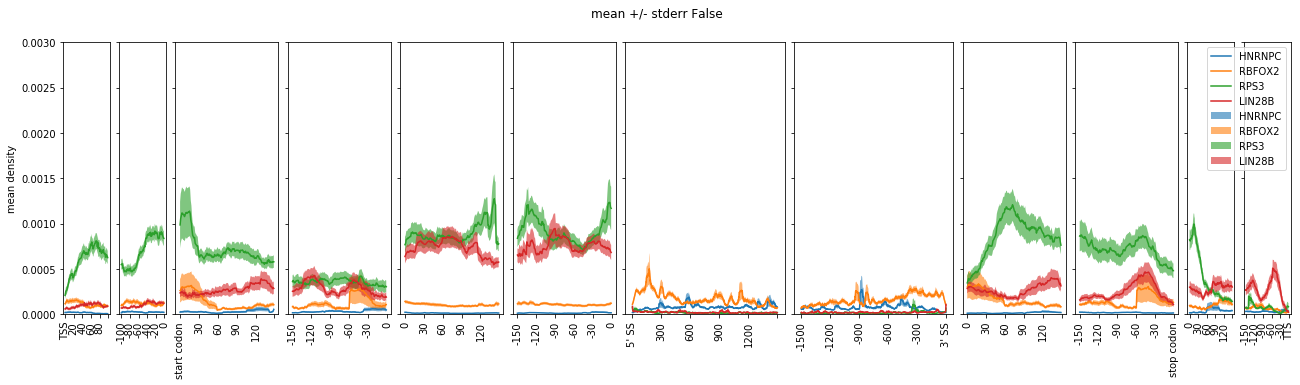

In [48]:
plot_mean_density([HNRNPC, RBFOX2, RPS3, LIN28B])

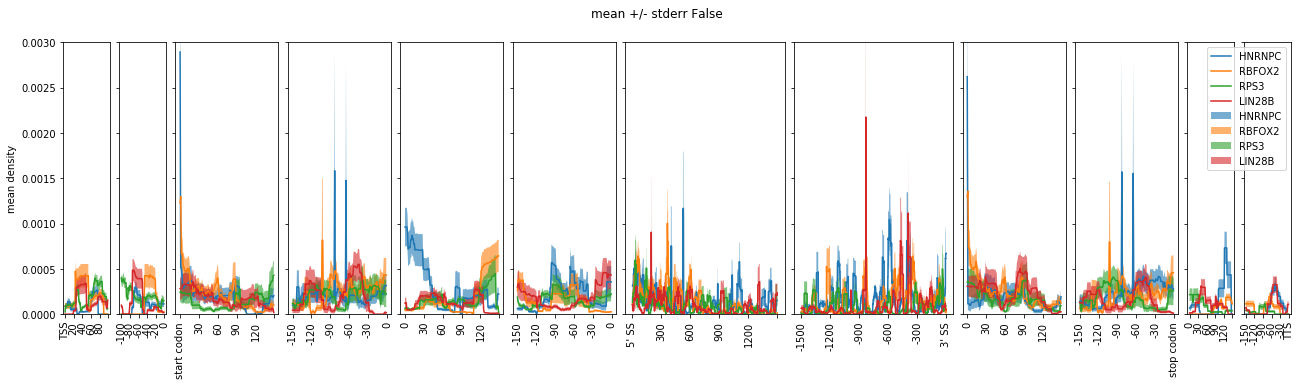

In [49]:
plot_mean_density([HNRNPC, RBFOX2, RPS3, LIN28B], example = 'negative')

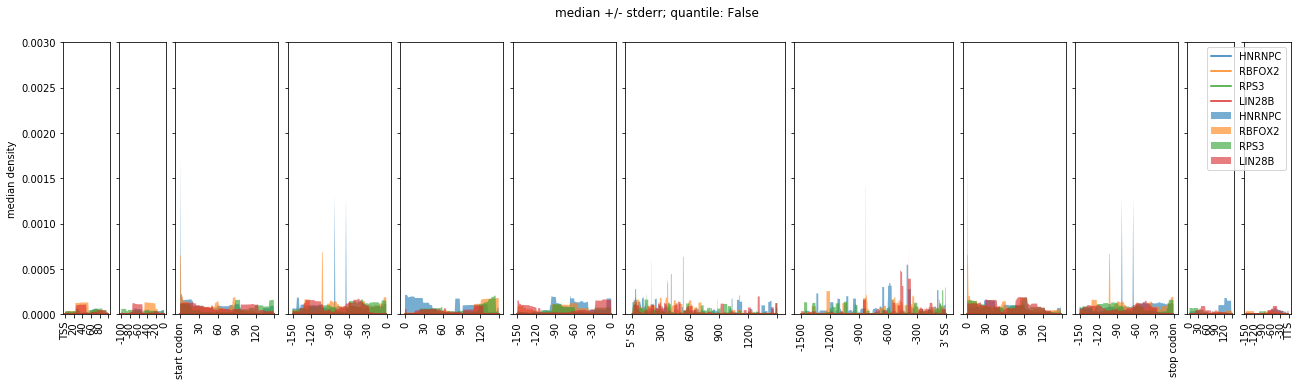

In [50]:
plot_median_density([HNRNPC, RBFOX2, RPS3, LIN28B], example = 'negative')

# Calculate relative entropy from positive and negative examples


`density_array_entropy()` does that for you

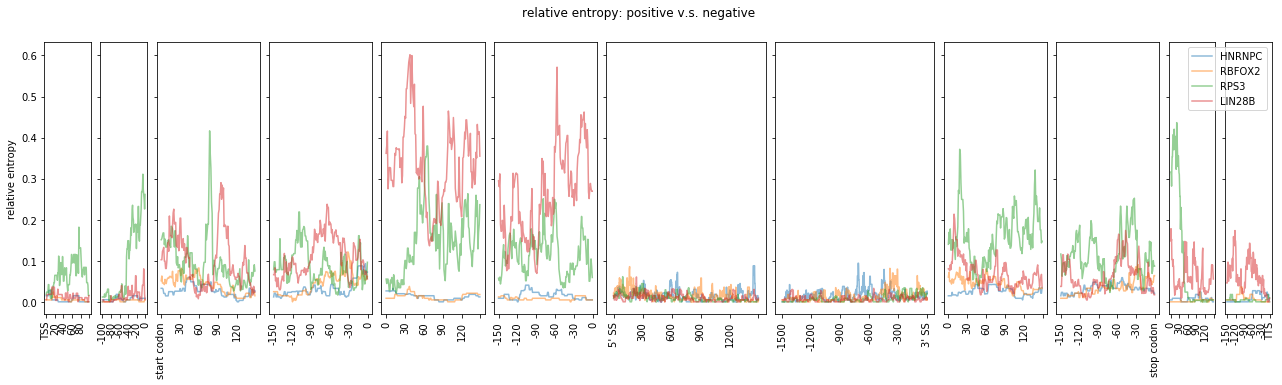

In [51]:
plot_entropy([HNRNPC, RBFOX2, RPS3, LIN28B], [HNRNPC_prob, RBFOX2_prob, RPS3_prob, LIN28B_prob])

# Generic bias from negative examples

In [52]:
eCLIPs = [HNRNPC, RPS3, RBFOX2, LIN28B]
eCLIP_probs = [HNRNPC_prob, RPS3_prob, RBFOX2_prob, LIN28B_prob]
background_probs = {}
for feat in featnames:
    for align in ['left', 'right']:
        all_prob = []
        for eCLIP, prob in zip(eCLIPs, eCLIP_probs):      
            all_prob += [prob['negative', feat,align, r] for r in ['rep1', 'rep2']]
        background_probs[feat, align] = np.mean(np.array(all_prob), axis = 0)
            
            
                

In [53]:
def plot_background(background_prob):
    '''plot prob distribution'''
    fig, ax_dict = generate_axis(rep = 'both', color_bar = True)
    
    # cm
    cm = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap = True)
    vmax = np.log(1)
    vmin = np.log(0.01)
    
    
    
    for keys in ax_dict.keys():
        if 'colorbar' not in keys:
            
            ax = ax_dict[keys]
            prob = background_prob[keys[:-1]]
        
        
            if 'three_utr' in keys:
                sns.heatmap(np.log(prob), cmap=cm, ax = ax, cbar_ax = ax_dict['colorbar'], vmin = vmin, vmax = vmax) 
            else:
                sns.heatmap(np.log(prob), cmap=cm, ax = ax, cbar = False, vmin = vmin, vmax = vmax) 
                bins = prob.shape[0]
    
    # set label\n",
    ax_dict['colorbar'].set_ylabel('log probability')
    _ = [ax_dict[keys].set_ylabel('density bins') for keys in ax_dict.keys() if 'five_utr' in keys and 'left' in keys]
   
    _ = [ax_dict[keys].invert_yaxis() for keys in ax_dict.keys() if 'five_utr' in keys and 'left' in keys]      
    _ = [ax_dict[keys].set_yticklabels(np.arange(1,bins)) for keys in ax_dict.keys() if 'five_utr' in keys]

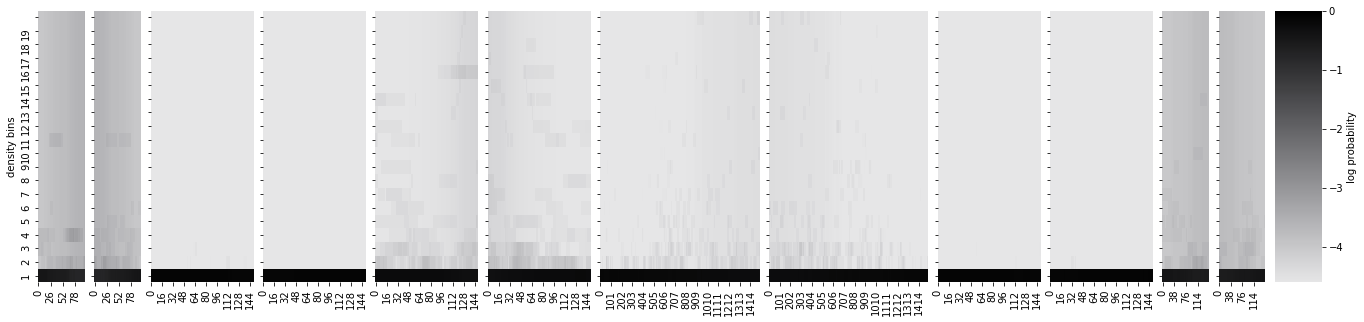

In [54]:
plot_background(background_probs)